<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter

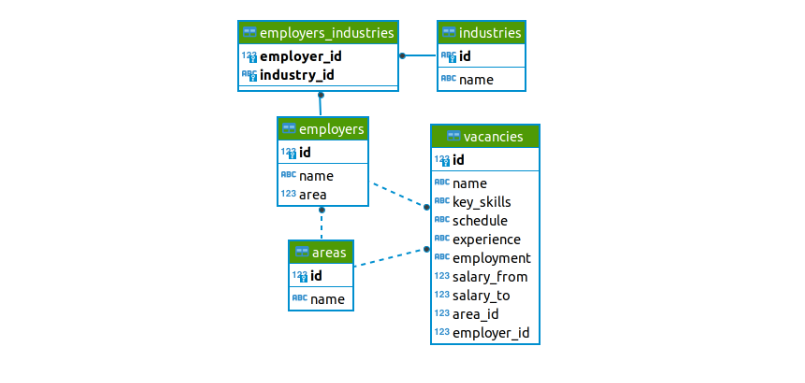

In [1]:
import pandas as pd
import psycopg2
import urllib.parse as req
import plotly.express as px

# Для лучшей визуализации уберём предупреждения интерпретатора, не влияющие на результат
import warnings
warnings.filterwarnings('ignore')

In [5]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [56]:
query_3_1 = f'''select
                    count(id)
                from public.vacancies
'''

In [57]:
cnt_vac = pd.read_sql_query(query_3_1, connection)
print(f'Количество вакансий в таблице vacancies: {cnt_vac.iloc[0][0]}')

Количество вакансий в таблице vacancies: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
query_3_2 = f'''select
                    count(id)
                from public.employers
'''

In [7]:
cnt_empl = pd.read_sql_query(query_3_2, connection)
print(f'Количество работодателей в таблице employers: {cnt_empl.iloc[0][0]}')

Количество работодателей в таблице employers: 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
query_3_3 = f'''select
                    count(id)
                from public.areas
'''

In [9]:
cnt_areas = pd.read_sql_query(query_3_3, connection)
print(f'Количество регионов в базе: {cnt_areas.iloc[0][0]}')

Количество регионов в базе: 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
query_3_4 = f'''select
                    count(id)
                from public.industries
'''

In [11]:
cnt_ind = pd.read_sql_query(query_3_4, connection)
print(f'Количество сфер деятельности в базе: {cnt_ind.iloc[0][0]}')

Количество сфер деятельности в базе: 294


***

#### Вывод
*Предварительный анализ данных таблиц показал, что база содержит информацию о 49197 вакансий, 23501 работодателе, 1362 регионах и 294 сферах деятельности.*

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
query_4_1 = f'''select
                    count(v.id),
                    a.name as area
                from 
                    public.vacancies as v
                    join public.areas as a on v.area_id = a.id
                group by a.id 
                order by count(v.id) desc
                limit 5
'''

In [13]:
cnt_vac_in_area = pd.read_sql_query(query_4_1, connection)
display(cnt_vac_in_area)

,count,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# Отфильтруем вакансии у которых поля с верхней или нижней границей заработной платы заполнены (is not null)
query_4_2 = f'''select
                    count(id) as cnt
                from 
                    public.vacancies
                
                where salary_from is not null or salary_to is not null
'''

In [15]:
cnt_vac_with_salary = pd.read_sql_query(query_4_2, connection)
print(f'У {cnt_vac_with_salary.iloc[0][0]} вакансий заполнено хотя бы одно из двух полей с зарплатой')

У 24073 вакансий заполнено хотя бы одно из двух полей с зарплатой


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
query_4_3 = f'''select
                    round(avg(salary_from)) as avg_salary_from,
                    round(avg(salary_to)) as avg_salary_to
                from 
                    public.vacancies
'''

In [17]:
avg_salary = pd.read_sql_query(query_4_3, connection)
print(f'Cредние значения для нижней границы зарплатной вилки - {avg_salary.iloc[0][0]} рублей, a \
верхней - {avg_salary.iloc[0][1]} рублей.')

Cредние значения для нижней границы зарплатной вилки - 71065.0 рублей, a верхней - 110537.0 рублей.


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
query_4_4 = f'''select
                    schedule,
                    employment,
                    count(id) as count_vacancies
                from 
                    public.vacancies
                group by schedule, employment
                order by count(id) desc
'''

In [19]:
cnt_vac_for_sch_empl = pd.read_sql_query(query_4_4, connection)
display(cnt_vac_for_sch_empl)

,schedule,employment,count_vacancies
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
query_4_5 = f'''select
                    experience,
                    count(id) as count_vacancies
                from
                    public.vacancies
                group by experience
                order by count(id)
'''

In [21]:
cnt_vac_for_exp = pd.read_sql_query(query_4_5, connection)
display(cnt_vac_for_exp)

,experience,count_vacancies
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

#### Вывод

*Детальный анализ вакансий показал, что в пятерке лидеров по количеству предложений, ожидаемо - Москва, с максимальным числом вакансий, и города-милилионники России, занимающие 2 и 3 место в рейтинге городов по численности соответственно. Также в эту пятёрку вошли 2 города СНГ, один из которых является столицей. Это закономерно, т.к. эти города являются научными, образовательными, культурными и промышленными центрами, привлекающими специалистов из более мелких городов.  Большая часть вакансий сосредоточена в городах миллионниках.*

*Более 70% вакансий всех вакансий - это вакансии предполагающие полную занятость и полный день, на 2-м месте по популярности (около 16%) - сочетание "полная занятость" и "удаленная работа"; все остальные пары типов графиков и трудоустройства составляют незначитильную часть представленных в таблице вакансий.*
 
*У более половины вакансий отсутствуют данные по вилке заработной платы. Cредние значения зарплатной вилки находятся в границах 70-110 тысяч рублей. Более половины работодателей устраивает опыт соискателей в пределах 1-3 лет, а для начинающих специалистов без опыта подходят не более 15% вакансий.*


---

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# Найдём работодателя, находящегося на первом месте по количеству вакансий и объединим полученный результат посредством union all
# с результатом запроса, в котором найдём работодателя, стоящего на пятом месте
query_5_1 = f'''(select
                    e.name,
                    count(v.id)
                from
                    public.vacancies as v
                    join public.employers as e on e.id = v.employer_id
                group by e.id
                order by count(v.id) desc
                limit 11)
                union all
                (select
                    ee.name,
                    count(vv.id)
                from
                    public.vacancies as vv
                    join public.employers as ee on ee.id = vv.employer_id
                group by ee.id
                order by count(vv.id) desc
                offset 4
                limit 1)
                order by 1 desc
'''

In [23]:
cnt_vac_by_empl = pd.read_sql_query(query_5_1, connection)
print(f'На первом месте по количеству вакансий среди работодателей находится компания "{cnt_vac_by_empl.iloc[0][0]}", a \
на пятом - "{cnt_vac_by_empl.iloc[1][0]}".')

На первом месте по количеству вакансий среди работодателей находится компания "Яндекс", a на пятом - "Тинькофф".


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# Соединим 3 таблицы через left join, сохранив все строки из таблицы areas.
# Отфильтруем строки, для которых нет вакансий (v.id is null)
query_5_2 = f'''select
                    a.name,
                    count(e.id) as cnt_employers,
                    count(v.id) as cnt_vacancies
                from
                    public.areas as a
                    left join public.employers as e on a.id = e.area
                    left join public.vacancies as v on a.id = v.area_id
                where v.id is null
                group by a.id
                order by count(e.id) desc
                limit 1
'''

In [25]:
cnt_empl_in_areas = pd.read_sql_query(query_5_2, connection)
print(f'Среди регионов, в которых нет вакансий, у региона "{cnt_empl_in_areas.iloc[0][0]}" наибольшее количество работодателей.')

Среди регионов, в которых нет вакансий, у региона "Россия" наибольшее количество работодателей.


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
query_5_3 = f'''select
                    e.name as employer,
                    count(distinct v.area_id) as cnt_areas
                from
                    public.employers as e
                    join public.vacancies as v on e.id = v.employer_id
                group by e.id
                order by count(distinct v.area_id) desc
                limit 5
'''

In [27]:
cnt_areas_for_empl = pd.read_sql_query(query_5_3, connection)
display(cnt_areas_for_empl)

,employer,cnt_areas
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# Присоединим к таблице employers через left join, таблицу employers_industries ,сохранив все строки таблицы employers
# Найдём незаполненные значения в поле ID сферы деятельности (ei.industry_id is null)
query_5_4 = f'''select
                    count(e.id) as cnt_employers
                from
                    public.employers as e
                    left join public.employers_industries as ei on e.id = ei.employer_id
                    where ei.industry_id is null
'''

In [29]:
cnt_empl_without_ind = pd.read_sql_query(query_5_4, connection)
print(f'{cnt_empl_without_ind.iloc[0][0]} работодателей не указали сферу деятельности.')

8419 работодателей не указали сферу деятельности.


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
query_5_5 = f'''select
                    e.name as employer
                from
                    public.employers as e
                    join public.employers_industries as ei on e.id = ei.employer_id
                    group by e.id
                    having count(ei.industry_id) = 4
                    order by e.name
                    offset 2
                    limit 1
''' 

In [31]:
third_empl_with_4ind = pd.read_sql_query(query_5_5, connection)
print(f'Компания "{third_empl_with_4ind.iloc[0][0]}" находится на третьем месте в алфавитном списке (по названию) компаний, \
у которых указаны четыре сферы деятельности.')

Компания "2ГИС" находится на третьем месте в алфавитном списке (по названию) компаний, у которых указаны четыре сферы деятельности.


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
# Соединим таблицу employers с таблицей, содержащей информациию о работодателях и таблицей, содержащей названия сфер деятельности
# Отфильтруем и выведем строки содержащие сферу деятельности Разработка программного обеспечения
query_5_6 = f'''select
                    count(e.id) as cnt_employers
                from
                    public.employers as e
                    join public.employers_industries as ei on e.id = ei.employer_id
                    join public.industries as i on i.id = ei.industry_id
                    where i.name = 'Разработка программного обеспечения'
'''

In [33]:
cnt_soft_empl = pd.read_sql_query(query_5_6, connection)
print(f'У {cnt_soft_empl.iloc[0][0]} работодателей в качестве сферы деятельности указана "разработка программного обеспечения".')


У 3553 работодателей в качестве сферы деятельности указана "разработка программного обеспечения".


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании, собранных в этой таблице. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [34]:
# Ссылка содержит кириллицу, перекодируем её для извлечение таблицы посредством библиотеки Pandas
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)

# Вызовем функцию read_html, передав аргументом ссылку на страницу и получим список таблиц в формате DataFrame
tables = pd.read_html(url)
# Нужная таблица находится под индексом 1
cities_df = pd.DataFrame(tables[1])
# Заменим некорректно отобразившееся название города 
cities_s = cities_df['Город'].replace('Воронеж[a]', 'Воронеж')
# Преобразуем объект Series в кортеж для использования в запросе sql
cities = tuple(cities_s)
print(cities)


('Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград')


In [35]:
# Соединим таблицы с вакансиями, работодателями и названиями городов
# Отфильтруем строки, оставляя те, что с именем Яндекс в поле с названием работодателя (e.name = 'Яндекс' ) и
# названиями городов, входящих в кортеж cities с названиями городов-миллионников
# Полученную таблицу посредством union all объединим с общим количеством вакансий компании, собранных в этой таблице (отфильтруем с теми же условиями)
query_5_7 = f'''select
                    a.name, 
                    count(v.id) as cnt_vacancies
                from
                    public.vacancies as v
                    join public.employers as e on e.id = v.employer_id
                    join public.areas as a on a.id = v.area_id
                where 
                    e.name = 'Яндекс' 
                    and a.name in {cities}
                group by e.name, a.name
                union all
                select
                    'Total', 
                    count(vv.id)
                from
                    public.vacancies as vv
                    join public.employers as ee on ee.id = vv.employer_id
                    join public.areas as aa on aa.id = vv.area_id
                    where ee.name = 'Яндекс'
                    and aa.name in {cities}
                    order by cnt_vacancies
'''

In [36]:
cnt_vac_yandex = pd.read_sql_query(query_5_7, connection)
cnt_vac_yandex

,name,cnt_vacancies
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

#### Вывод

*Анализ работодателей показал, что главным игроком на рынке труда является компания Яндекс, с большим отрывом от других компаний. Это ведущая российская ИТ-компания, использующая машинное обучение во всех своих сервисах. Компания разместила больше всего вакансий во всех городах-милионниках России.*

*Охват Яндекса по регионам самый большой среди работодателей, компания разместила вакансии в 181 регионе, за ней следуют компании "Ростелеком" (телекоммуникационные услуги), ООО "Спецремонт" (монтаж, ремонт, модернизацию спецтехники), ИП "Поляков Денис Иванович" (различные услуги: распространение рекламной продукции, ремонт ПК и т.д.), ООО "ЕФИН" (логистический оператор возвратных финансово-кредитных документов и финансовых продуктов, разработчик и арендатор специалированного ПО).*

*Учитывая, что меньше 2/3 работодателей не указали свои сферы деятельности, из 294 сфер деятельности, представленных в таблице-справочнике, разработкой програмного обеспечения занимаются 15% работодателей. Это заметно и по списку компаний-лидеров по охвату территории рынка труда, где 3 из 5 компаний занимаются разработкой ПО, так и среди лидеров по числу вакансий, где  таких компаний - 4 из 5.*

---

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [58]:
query_6_1 = f'''select
                    count(id) as cnt_vacancies
                from
                    public.vacancies
                where lower(name) like '%data%' or lower(name) like '%данн%'
'''

In [59]:
cnt_ds_vac = pd.read_sql_query(query_6_1, connection)
print(f'{cnt_ds_vac.iloc[0][0]} вакансий имеет отношение к данным.')

1771 вакансий имеет отношение к данным.


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [39]:
query_6_2 = f'''select
                    count(id)
                from
                    public.vacancies
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and 
                    (name ilike '%junior%'
                    or experience = 'Нет опыта'
                    or employment = 'Стажировка')
'''

In [40]:
cnt_jun_ds_vac = pd.read_sql_query(query_6_2, connection)
print(f'{cnt_jun_ds_vac.iloc[0][0]} вакансия подходит для начинающего дата-сайентиста.')

51 вакансия подходит для начинающего дата-сайентиста.


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [41]:
query_6_3 = f'''select
                    count(id)
                from
                    public.vacancies
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and 
                    (key_skills ilike '%SQL%'
                    or key_skills ilike '%postgres%')
'''

In [42]:
cnt_sql_ds_vac = pd.read_sql_query(query_6_3, connection)
print(f'В {cnt_sql_ds_vac.iloc[0][0]} вакансии в качестве ключевого навыка указан SQL или postgres.')

В 201 вакансии в качестве ключевого навыка указан SQL или postgres.


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [43]:
query_6_4 = f'''select
                    count(id)
                from
                    public.vacancies
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and 
                    key_skills ilike '%Python%'
'''

In [44]:
cnt_py_ds_vac = pd.read_sql_query(query_6_4, connection)
print(f'В {cnt_py_ds_vac.iloc[0][0]} вакансии в качестве ключевого навыка указан Python.')

В 351 вакансии в качестве ключевого навыка указан Python.


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [45]:
# Ключевые навыки перечислены в одном поле и разделены знаком табуляции (CHR(9)) 
# Применим для вычисления количества навыков строковую функцию
# Заменим в key_skills CHR(9) на "" и найдём длину строки, полученный результат вычтем из длины key_skills
# и прибавим 1, т.к. символов табуляции встроке меньше на 1, чем навыков
# Возьмем среднее полученного выражения и округлим его значение
query_6_5 = f'''select
                    round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2)
                    
                from
                    public.vacancies
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
'''

In [46]:
cnt_ks_ds_vac = pd.read_sql_query(query_6_5, connection)
print(f'В вакансиях для DS в среднем укзывается {cnt_ks_ds_vac.iloc[0][0]} ключевых навыков.')

В вакансиях для DS в среднем укзывается 6.41 ключевых навыков.


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [47]:
# Запрос для нахождения средней зарплаты для дата-сайентиста со всеми типами требуемого опыта работы
query_6_6 = f'''select
                    distinct experience,
                    round(avg(coalesce(((salary_from + salary_to)/2), salary_from, salary_to)))
                from
                    public.vacancies
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and (salary_from is not null or salary_to is not null)
                    group by experience
''' 
# Запрос для нахождения средней зарплаты для дата-сайентиста с опытом работы от 3 до 6 лет 
 
query_6_6_1 = f'''select
                    round(avg(coalesce(((salary_from + salary_to)/2), salary_from, salary_to)))
                from
                    public.vacancies
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and (salary_from is not null or salary_to is not null)
                    and experience = 'От 3 до 6 лет'
'''

In [48]:
ds_avg_sal = pd.read_sql_query(query_6_6, connection)
display(ds_avg_sal)

ds_avg_sal_3_6Y = pd.read_sql_query(query_6_6_1, connection)
print(f'Дата-сайентист с опытом работы от 3 до 6 лет может расчитывать в среднем на зарплату {ds_avg_sal_3_6Y.iloc[0][0]} рублей.')



,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Дата-сайентист с опытом работы от 3 до 6 лет может расчитывать в среднем на зарплату 243115.0 рублей.


***

#### Вывод

*Как показал предметный анализ, из общего числа вакансий 3,6% имеют отношение к данным. Для более тщательного анализа нужно удалить строки, содержащие в поле имя вакансии - "C++ разработчик (QML)"*

*Средняя зарплата дата саентиста с опытом работы от 3 до 6 лет - 243 тысяч рублей, начинающий же специалист в среднем может претендовать на зарслату - 75 тысяч рублей.* 

*Для того чтобы удвоить свои шансы найти работу в области больших данных к владению SQL необходимо добавить Python, и в целом дата саентисту необходимо владеть в среднем 6-7 ключевыми навыками.* 

*Для начинающих специалистов DS в таблице вакансий - 51 позиция, например для студентов скил фэктори нашего потока (1024) это почти 5 человек на место (приблизительный подсчёт по количеству студентов в группе в Slack).*

---

#### Дополнительные исследования

7. Выясним, как распределяется по регионам количество вакансий, связанных с данными

In [7]:
# Узнаем количество вакансий DS по регионам
# В предыдущих исследованиях попадались строки с именем вакансии "C++ разработчик (QML)", отбросим их
query_6_7 = f'''select
                    count(v.id) as count_vacancies,
                    a.name as area
                from 
                    public.vacancies as v
                    join public.areas as a on v.area_id = a.id
                where (v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name like '%ML%' and v.name not ilike '%HTML%' and v.name not ilike '%C++ разработчик (QML)%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%')
                group by a.id 
                order by count(v.id) desc
'''

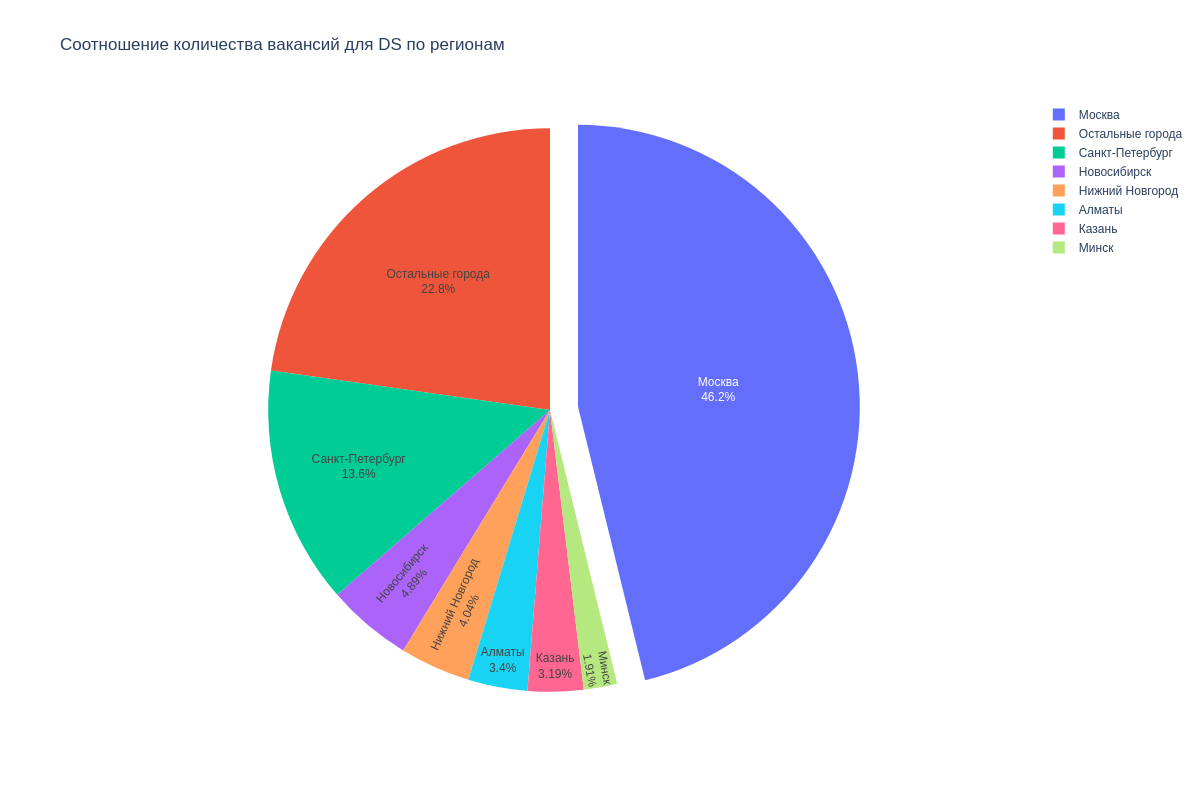

In [9]:
cnt_ds_vac_in_area = pd.read_sql_query(query_6_7, connection)

# Для лучшего восприятия круговой диаграммы, 
# уменьшим количество сегментов круга путём объединения части городов, доля количества вакансий которых менее 1,9%
# Заменим названия городов, где количество вакансий меньше 9 на "Остальные города"
cnt_ds_vac_in_area.loc[(cnt_ds_vac_in_area['count_vacancies'] < 9), 'area'] = 'Остальные города'

# Построим круговую диаграмму с помощью библиотеки Plotly Express и выделим сегмент с наибольшим значением
fig = px.pie(
    cnt_ds_vac_in_area,
    values='count_vacancies',
    names='area',
    height=800,
    width=1200,
    title='Соотношение количества вакансий для DS по регионам',
)
fig.update_traces(textposition='inside', textinfo='percent+label', pull=[0.1, 0, 0, 0, 0, 0, 0, 0])

# Сохраним диаграмму в формате html в папке plotly
fig.write_html('plotly/img_1.html')

# Отобразим диаграмму в формате png для корректного отображения на githab
fig.show('png')

#fig.show()


8) Выясним, как меняется заработная плата DS с опытом работы и взависимости от региона

In [ ]:
#Посмотрим, как влияет опыт работы на заработную плату и найдём количество вакансий соответствующих опыту для Москвы и остальных регионов, не включая Москву
query_6_8 = f'''select
                    'Все регионы' as region,
                    v.experience,
                    count(v.id) as count_vacancies,
                    round(avg(coalesce(((v.salary_from + v.salary_to)/2), v.salary_from, v.salary_to))) as avg_salary
                from
                    public.vacancies as v
                    join public.areas as a on a.id = v.area_id
                where v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name like '%ML%' and v.name not ilike '%HTML%' and v.name not ilike '%C++ разработчик (QML)%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%'
                    and
                    a.name <> 'Москва'
                group by v.experience
                union all
                select
                    'Москва' as region,
                    vv.experience,
                    count(vv.id),
                    round(avg(coalesce(((vv.salary_from + vv.salary_to)/2), vv.salary_from, vv.salary_to)))
                from
                    public.vacancies as vv
                    join public.areas as aa on aa.id = vv.area_id
                where vv.name ilike '%data scientist%' 
                    or vv.name ilike '%data science%'
                    or vv.name ilike '%исследователь данных%'
                    or (vv.name like '%ML%' and vv.name not ilike '%HTML%' and vv.name not ilike '%C++ разработчик (QML)%')
                    or vv.name ilike '%machine learning%'
                    or vv.name ilike '%машинн%обучен%'
                    and                     
                    aa.name = 'Москва'
                group by vv.experience
                order by 2
'''

In [ ]:
cnt_ds_vac_by_exp = pd.read_sql_query(query_6_8, connection)
cnt_ds_vac_by_exp

,region,experience,count_vacancies,avg_salary
0,Москва,Более 6 лет,34,NaN
1,Все регионы,Более 6 лет,34,NaN
2,Все регионы,Нет опыта,27,74643.0
3,Москва,Нет опыта,27,67917.0
4,Москва,От 1 года до 3 лет,216,146836.0
5,Все регионы,От 1 года до 3 лет,220,144265.0
6,Москва,От 3 до 6 лет,184,244773.0
7,Все регионы,От 3 до 6 лет,186,243115.0


9) Дополним исследование в пункте 6.4 и выясним какой из ключевых навыков DS популярнее: Python или JavaScript

In [ ]:
# Выясним сколько вакансий требуют навыка владения JavaScript
query_6_9 = f'''select
                    count(id)
                from
                    public.vacancies
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%'
                    or name ilike '%исследователь данных%'
                    or (name like '%ML%' and name not ilike '%HTML%')
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and 
                    key_skills ilike '%Java%'
'''

In [ ]:
cnt_java_ds_vac = pd.read_sql_query(query_6_9, connection)
print(f'В {cnt_java_ds_vac.iloc[0][0]} вакансиях в качестве ключевого навыка указан JavaScript (для сравнения знания Python требуется в 351 вакансии)')

В 28 вакансиях в качестве ключевого навыка указан JavaScript (для сравнения знания Python требуется в 351 вакансии)


7) Для себя, как будущего соискателя в сфере работы с большими данными, дополню проект следующим исследованием:

Сколько в базе подходящих вакансий для начинающего дата-сайентиста без опыта в Москве и остальных регионах, в которых в качестве ключевых навыков указаны Python или SQL, или postgres. Также для этих регионов вывести среднюю зарплату

In [ ]:

query_6_10 = f'''select
                    'Все регионы' as area, 
                    count(v.id) as cnt_vacancies,
                    round(avg(coalesce(((salary_from + salary_to)/2), salary_from, salary_to))) as avg_salary
                from
                    public.vacancies as v
                    join public.areas as a on a.id = v.area_id
                where (v.name ilike '%data scientist%' 
                    or v.name ilike '%data science%'
                    or v.name ilike '%исследователь данных%'
                    or (v.name like '%ML%' and v.name not ilike '%HTML%')
                    or v.name ilike '%machine learning%'
                    or v.name ilike '%машинн%обучен%')
                    and                     
                    (v.key_skills ilike '%Python%'
                    or v.key_skills ilike '%SQL%'
                    or v.key_skills ilike '%postgres%')
                    and 
                    v.experience = 'Нет опыта'
                    and 
                    a.name <> 'Москва'
                union all
                select
                    'Москва', 
                    count(vv.id),
                    round(avg(coalesce(((salary_from + salary_to)/2), salary_from, salary_to)))
                from
                    public.vacancies as vv
                    join public.areas as aa on aa.id = vv.area_id
                where (vv.name ilike '%data scientist%' 
                    or vv.name ilike '%data science%'
                    or vv.name ilike '%исследователь данных%'
                    or (vv.name like '%ML%' and vv.name not ilike '%HTML%')
                    or vv.name ilike '%machine learning%'
                    or vv.name ilike '%машинн%обучен%')
                    and                     
                    (vv.key_skills ilike '%Python%'
                    or vv.key_skills ilike '%SQL%'
                    or vv.key_skills ilike '%postgres%')
                    and 
                    vv.experience = 'Нет опыта'
                    and 
                    aa.name = 'Москва'
                    
'''

In [ ]:
cnt_vac_for_sf_stud = pd.read_sql_query(query_6_10, connection)
cnt_vac_for_sf_stud

,area,cnt_vacancies,avg_salary
0,Москва,8,72500.0
1,Все регионы,16,75000.0


# Общий вывод по проекту

Аналитики данных востребованы практически во всех сферах бизнеса. Лидерами среди работодателей являются технологические компании, работающие в области информационных технологий, телекоммуникационных услуг, банковской сфере, цифровых и медийных сервисов. Это такие компании, как Яндекс, Ростелеком, Тинькофф, СБЕР, Газпром нефть, ИК СИБИНТЕК, МТС и др.

Больше всего вакансий связанных с данными открыто в Москве (217) и в Санкт-Петербурге (64). И в целом, такие вакансии представленны в основном в городах-милионниках, столицах и науко-градах.

Заработная плата аналитика данных зависит от опыта и региона и лежит в диапазоне от 68 до 245 тысяч рублей. В таблице значения зарплат в Москве и регионах практически одинаковые, что не совсем корректно, т.к. в регионы входят и города других государств, где уровень зарплат может быть выше. Так же нельзя ориентироваться на среднюю зарплату для позиции "Нет опыта", т.к. у большинства строк не заполнены соответствующие поля.

Как показывает анализ, большинство работодателей требуют знания Python (351 вакансия), ключевой навык Java встречается в 28 вакансиях, а R - совсем не популярен.

Для начинающего DS без опыта, владеющего навыками Python или SQL(postgres), в базе нашлось всего 8 вакансий в Москве и 10 в других регионах. Средняя зарплата такого специалиста в Москве - 72 тысячи, а в других регионах - 75 тысяч рублей. Эти результаты не вполне корректные, т.к. у преобладающего большинства этих вакансий не заполнены поля с заработной платой.

In [ ]:
connection.close()